# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`

In [1]:
# load datasets
import pandas as pd
% matplotlib inline

In [2]:
df_08 = pd.read_csv('clean_08.csv')
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [3]:
df_18 = pd.read_csv('clean_18.csv')
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No


In [4]:
df_08['fuel'].value_counts()

Gasoline    984
CNG           1
gas           1
ethanol       1
Name: fuel, dtype: int64

In [5]:
df_18['fuel'].value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [9]:
count_08 = df_08.shape[0]
count_08_cng = len(df_08.query('fuel == "CNG"'))
count_08_eth = len(df_08.query('fuel == "ethanol"'))

prop_08_alt_fuel = (count_08_cng + count_08_eth) / count_08

print('08 alt fuel proportion: {}'.format(prop_08_alt_fuel))

fuels08 = df_08.groupby('fuel')['model'].count()
fuels08

08 alt fuel proportion: 0.002026342451874367


fuel
CNG           1
Gasoline    984
ethanol       1
gas           1
Name: model, dtype: int64

In [10]:
count_18 = df_18.shape[0]
count_18_diesel = len(df_18.query('fuel == "Diesel"'))
count_18_elec = len(df_18.query('fuel == "Electricity"'))
count_18_eth = len(df_18.query('fuel == "Ethanol"'))

prop_18_alt_fuel = (count_18_diesel + count_18_elec + count_18_eth) / count_18

print('18 alt fuel proportion: {}'.format(prop_18_alt_fuel))

fuels18 = df_18.groupby('fuel')['model'].count()
fuels18

18 alt fuel proportion: 0.06850961538461539


fuel
Diesel          19
Electricity     12
Ethanol         26
Gas             26
Gasoline       749
Name: model, dtype: int64

In [11]:
pct_inc = (prop_18_alt_fuel - prop_08_alt_fuel) * 100

print('from 2008 to 2018 use of alt fuels by unique models has increased by {:0.2f}%'.format(pct_inc))

from 2008 to 2018 use of alt fuels by unique models has increased by 6.65%


In [12]:
fuels18 - fuels08

fuel
CNG              NaN
Diesel           NaN
Electricity      NaN
Ethanol          NaN
Gas              NaN
Gasoline      -235.0
ethanol          NaN
gas              NaN
Name: model, dtype: float64

### Q2: How much have vehicle classes improved in fuel economy?  

In [13]:
mpg_by_class_08 = df_08.groupby('veh_class')['cmb_mpg'].mean()

In [14]:
mpg_by_class_18 = df_18.groupby('veh_class')['cmb_mpg'].mean()

In [15]:
mpg_by_class_18 - mpg_by_class_08

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [17]:
df_08.groupby('smartway').mean()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
no,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
yes,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421


In [18]:
df_18.groupby('smartway').mean()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
Elite,1.970588,4.000000,7.000000,53.235294,53.117647,53.000000,10.000000
No,3.270304,5.720994,3.798343,19.325967,26.708564,22.041436,4.276243
Yes,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462


### Q4: What features are associated with better fuel economy?

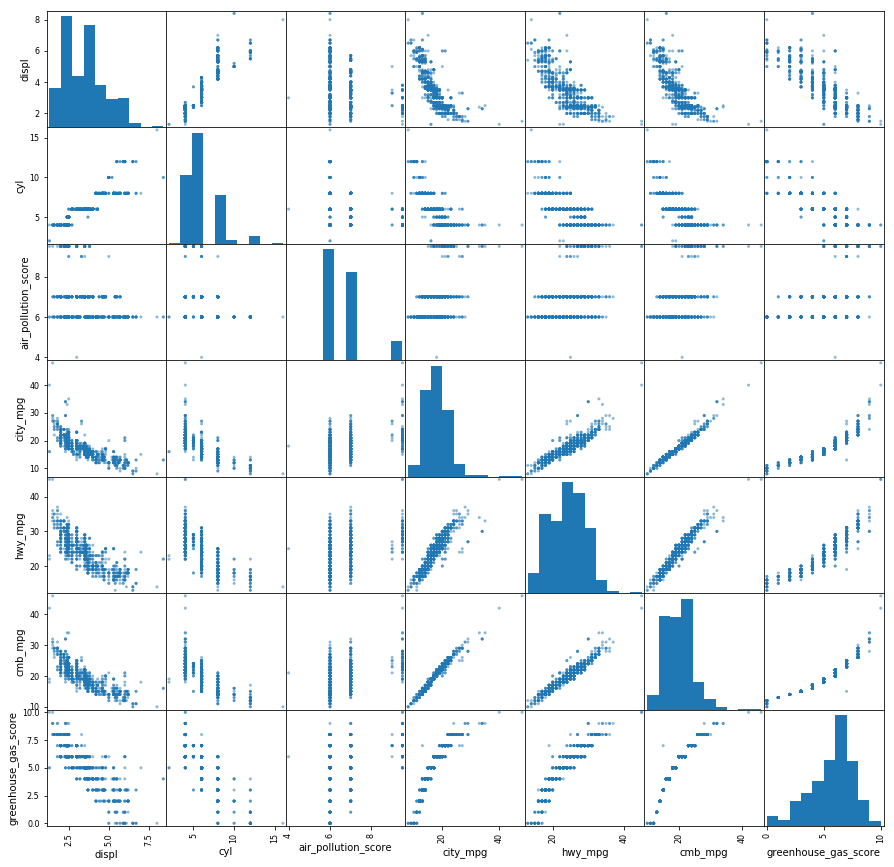

In [20]:
pd.plotting.scatter_matrix(df_08, figsize=(15,15));

greenhouse gas score is positively correlated. displacement and cylinder count are negatively correlated.